# O impacto que a energia limpa fará no futuro.
## -------------------------------------------------
## Faculdade : FIAP
## Turma : 2ESPF -> FIAP
## -------------------------------------------------
## Integrantes:
### Ricardo Vergani - RM
### Victor Kenzo - RM
### Murilo Marsola - RM
## -------------------------------------------------


#### **Essa parte de códigos a seguir nada mais é que a limpeza do DataSet (Retirar dados não utilizados), importações para auxilio na visualização e a criação dos gráficos e tabelas utilizados no documento a seguir.🤓**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

emissaoCO2_df = pd.read_csv("co2_emissions.csv")

emissaoCO2_df.replace('Power', 'Energia', inplace=True)
emissaoCO2_df.replace('Industry', 'Industrial', inplace=True)
emissaoCO2_df.replace('Ground Transport', 'Meios de Transporte', inplace=True)
emissaoCO2_df.replace('Residential', 'Residencial', inplace=True)
emissaoCO2_df.replace('Domestic Aviation', 'Voo Nacional', inplace=True)
emissaoCO2_df.replace('International Aviation', 'Voo Internacional', inplace=True)

emissaoCO2_Brasil_df = emissaoCO2_df[emissaoCO2_df["country"]=="Brazil"]



diferentesGeradores_df = pd.read_csv("energy_dataset.csv")
colunas_para_remover = [
    "generation hydro pumped storage consumption",
    "generation fossil coal-derived gas",
    "generation fossil oil shale",
    "generation fossil peat",
    "generation geothermal",
    "generation hydro pumped storage aggregated",
    "generation marine",
    "generation other",
    "generation other renewable",
    "generation wind offshore",
    "forecast solar day ahead",
    "forecast wind offshore eday ahead",
    "forecast wind onshore day ahead",
    "total load forecast",
    "total load actual",
    "price day ahead",
    "price actual",
    "generation fossil brown coal/lignite"]
diferentesGeradores_df = diferentesGeradores_df.drop(columns=colunas_para_remover)

colunas_traduzidas = {
    "time": "date",
    "generation biomass": "Biomassa",
    "generation fossil gas": "Gás fóssil",
    "generation fossil hard coal": "Carvão mineral",
    "generation fossil oil": "Petróleo",
    "generation hydro run-of-river and poundage": "Geração hídrica em leitos e represamentos",
    "generation hydro water reservoir": "Geração hídrica por reservatórios",
    "generation nuclear": "Geração nuclear",
    "generation solar": "Geração solar",
    "generation waste": "Geração por resíduos",
    "generation wind onshore": "Geração eólica"}
diferentesGeradores_df = diferentesGeradores_df.rename(columns=colunas_traduzidas)

diferentesGeradores_df = diferentesGeradores_df.loc[(diferentesGeradores_df != 0).all(axis=1)]
diferentesGeradores_df['date'] = pd.to_datetime(diferentesGeradores_df['date'], utc=True)
diferentesGeradores_df['date'] = diferentesGeradores_df['date'].dt.date
diferentesGeradores_df = diferentesGeradores_df.groupby('date', as_index=False).mean()
diferentesGeradores_df = diferentesGeradores_df.round(2)


def pergunta_No1_Brasil():
  energia_brasil = emissaoCO2_Brasil_df[emissaoCO2_Brasil_df['sector'] == "Energia"]
  industrias_brasil = emissaoCO2_Brasil_df[emissaoCO2_Brasil_df['sector'] == "Industrial"]
  transportes_brasil = emissaoCO2_Brasil_df[emissaoCO2_Brasil_df['sector'] == "Meios de Transporte"]
  residencial_brasil = emissaoCO2_Brasil_df[emissaoCO2_Brasil_df['sector'] == "Residencial"]
  voo_nacional_brasil = emissaoCO2_Brasil_df[emissaoCO2_Brasil_df['sector'] == "Voo Nacional"]
  voo_internacional_brasil = emissaoCO2_Brasil_df[emissaoCO2_Brasil_df['sector'] == "Voo Internacional"]

  brasil_data = [
      {'Setor': 'Transportes', 'Emissões Média': round(transportes_brasil['value'].mean(), 2)},
      {'Setor': 'Indústrias', 'Emissões Média': round(industrias_brasil['value'].mean(), 2)},
      {'Setor': 'Energia', 'Emissões Média': round(energia_brasil['value'].mean(), 2)},
      {'Setor': 'Residencial', 'Emissões Média': round(residencial_brasil['value'].mean(), 2)},
      {'Setor': 'Voos Nacionais', 'Emissões Média': round(voo_nacional_brasil['value'].mean(), 2)},
      {'Setor': 'Voos Internacionais', 'Emissões Média': round(voo_internacional_brasil['value'].mean(), 2)},
  ]

  brasil_df = pd.DataFrame(brasil_data)


  brasil_df.index = range(1, len(brasil_df) + 1)

  styled_brasil_table = brasil_df.style.set_table_styles(
      [{'selector': 'thead th', 'props': [('background-color', 'purple'), ('color', 'black'), ('font-weight', 'bold'), ('text-align', 'center'), ('font-size', '16px')]},
       {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'white'), ('font-size', '14px')]},  # Texto maior
       {'selector': 'table', 'props': [('width', '90%'), ('margin', 'auto')]},  # Maior largura da tabela
       {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'black')]},
       {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'black')]},
       {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},
       {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]},
       {'selector': 'thead th', 'props': [('border', '1px solid #ddd')]},
      ])

  return display(styled_brasil_table)



def pergunta_No1_Mundo():
  energia = emissaoCO2_df[emissaoCO2_df['sector'] == "Energia"]
  industrias = emissaoCO2_df[emissaoCO2_df['sector'] == "Industrial"]
  transportes = emissaoCO2_df[emissaoCO2_df['sector'] == "Meios de Transporte"]
  residencial = emissaoCO2_df[emissaoCO2_df['sector'] == "Residencial"]
  voo_nacional = emissaoCO2_df[emissaoCO2_df['sector'] == "Voo Nacional"]
  voo_internacional = emissaoCO2_df[emissaoCO2_df['sector'] == "Voo Internacional"]

  mundo_data = [
      {'Setor': 'Energia', 'Emissões Média': round(energia['value'].mean(), 2)},
      {'Setor': 'Indústrias', 'Emissões Média': round(industrias['value'].mean(), 2)},
      {'Setor': 'Transportes', 'Emissões Média': round(transportes['value'].mean(), 2)},
      {'Setor': 'Residencial', 'Emissões Média': round(residencial['value'].mean(), 2)},
      {'Setor': 'Voos Internacionais', 'Emissões Média': round(voo_internacional['value'].mean(), 2)},
      {'Setor': 'Voos Nacionais', 'Emissões Média': round(voo_nacional['value'].mean(), 2)},
  ]

  mundo_df = pd.DataFrame(mundo_data)

  mundo_df.index = range(1, len(mundo_df) + 1)
  styled_mundo_table = mundo_df.style.set_table_styles(
      [{'selector': 'thead th', 'props': [('background-color', 'purple'), ('color', 'black'), ('font-weight', 'bold'), ('text-align', 'center'), ('font-size', '16px')]},
       {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'white'), ('font-size', '14px')]},  # Texto maior
       {'selector': 'table', 'props': [('width', '90%'), ('margin', 'auto')]},  # Maior largura da tabela
       {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'black')]},
       {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'black')]},
       {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},
       {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]},
       {'selector': 'thead th', 'props': [('border', '1px solid #ddd')]},
      ])
  return display(styled_mundo_table)



def pergunta_No2(emissaoCO2_df):
  emissaoCO2_df['date'] = pd.to_datetime(emissaoCO2_df['date'], format='%d/%m/%Y')

  emissaoCO2_df = emissaoCO2_df[(emissaoCO2_df['date'] >= '2019-01-01') & (emissaoCO2_df['date'] <= '2023-12-31')]
  emissaoCO2_df = emissaoCO2_df[~emissaoCO2_df['country'].isin(['WORLD', 'ROW', 'EU27 & UK'])]

  country_sector_emissions = emissaoCO2_df.groupby(['country', 'sector'])['value'].sum().reset_index()

  country_emissions = country_sector_emissions.groupby('country')['value'].sum().reset_index()

  country_emissions_sorted = country_emissions.sort_values(by='value', ascending=False)

  top_10_countries = country_emissions_sorted.head(10)

  top_10_country_sector = []

  for country in top_10_countries['country']:

      country_data = country_sector_emissions[country_sector_emissions['country'] == country]

      top_sector = country_data.loc[country_data['value'].idxmax(), 'sector']

      top_10_country_sector.append({
          'País': country,
          'Emissões Totais': round(top_10_countries[top_10_countries['country'] == country]['value'].values[0], 2),
          'Setor que mais poluiu': top_sector
      })

  top_10_df = pd.DataFrame(top_10_country_sector)

  top_10_df.index = range(1, len(top_10_df) + 1)

  top_10_df['Emissões Totais'] = top_10_df['Emissões Totais'].apply(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))

  styled_table = top_10_df.style.set_table_styles(
      [{'selector': 'thead th', 'props': [('background-color', 'purple'), ('color', 'Black'), ('font-weight', 'bold'), ('text-align', 'center')]},
       {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'white')]},
       {'selector': 'table', 'props': [('width', '80%'), ('margin', 'auto')]},
       {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'black')]},
       {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'black')]},
       {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},
       {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]},
       {'selector': 'thead th', 'props': [('border', '1px solid #ddd')]},
      ])

  return styled_table



def pergunta_No3():
  emissaoCO2_df['date'] = pd.to_datetime(emissaoCO2_df['date'], format='%d/%m/%Y')
  emissaoCO2_df['year'] = emissaoCO2_df['date'].dt.year
  filtered_df_global = emissaoCO2_df[emissaoCO2_df['year'].isin([2019, 2020, 2021, 2022])]
  average_emissions_global = filtered_df_global.groupby(['year', 'sector'])['value'].mean().unstack()

  cores = ['purple', 'orange', 'blue', 'green', 'red', 'brown']
  cont=0
  plt.figure(figsize=(14, 7))
  ax = average_emissions_global.plot(kind='bar', ax=plt.gca(), color=cores)

  for sector in average_emissions_global.columns:
      top_value_2019 = average_emissions_global.loc[2019, sector]
      plt.axhline(y=top_value_2019, color=cores[cont], linestyle='--', linewidth=1, label=f'Topo 2019: {sector}')
      cont+=1

  handles, labels = plt.gca().get_legend_handles_labels()
  unique_labels = dict(zip(labels, handles))
  plt.legend(unique_labels.values(), unique_labels.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.title('Média Global de Emissões de CO2 por Setor (2019 vs Anos da Pandemia)')
  plt.ylabel('Média de Emissão de CO2')
  plt.xlabel('Ano')
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()



def pergunta_No4(emissaoCO2_df):
  emissaoCO2_df['date'] = pd.to_datetime(emissaoCO2_df['date'], format='%d/%m/%Y')
  emissaoCO2_df = emissaoCO2_df[(emissaoCO2_df['date'] >= '2019-01-01') & (emissaoCO2_df['date'] <= '2023-01-01')]

  sectors = emissaoCO2_df['sector'].unique()
  predictions = {}
  plt.figure(figsize=(12, 8))

  for sector in sectors:
      sector_data = emissaoCO2_df[emissaoCO2_df['sector'] == sector]

      sector_data = sector_data.groupby('date')['value'].sum().reset_index()

      sector_data['days_since_start'] = (sector_data['date'] - sector_data['date'].min()).dt.days

      X = sector_data[['days_since_start']]
      y = sector_data['value']

      model = LinearRegression()
      model.fit(X, y)

      future_dates = pd.date_range(start='2024-01-01', end='2030-12-31', freq='ME')
      future_days = (future_dates - sector_data['date'].min()).days
      future_days = np.array(future_days).reshape(-1, 1)

      future_predictions = model.predict(future_days)

      plt.plot(future_dates, future_predictions, label=f'Previsão {sector}', linestyle='--')

  plt.title('Previsão de Emissões de CO2 por Setor (2024-2030)')
  plt.xlabel('Data')
  plt.ylabel('Emissões de CO2')
  plt.legend()
  plt.grid(True)
  plt.show()



def pergunta_No5(emissaoCO2_df):
  emissaoCO2_df['date'] = pd.to_datetime(emissaoCO2_df['date'], format='%d/%m/%Y')
  filtered_data = emissaoCO2_df[emissaoCO2_df['date'].dt.day == 1]
  encoded_data = pd.get_dummies(filtered_data, columns=['country', 'sector'])

  X = encoded_data.drop(['value', 'date'], axis=1)
  y = encoded_data['value']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, alpha=0.6)
  plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', linewidth=2)
  plt.xlabel('Valores reais')
  plt.ylabel('Valores previstos')
  plt.title('Valor atual vs. Valor previsto')
  plt.grid(True)
  plt.show()



def pergunta_No6(diferentesGeradores_df):
  diferentesGeradores_df['date'] = pd.to_datetime(diferentesGeradores_df['date']).dt.year
  dados_agrupados = diferentesGeradores_df.groupby('date').sum()

  fossil_columns = ['Carvão mineral', 'Gás fóssil', 'Petróleo', 'Geração nuclear']
  renewable_columns = ['Geração solar', 'Geração eólica', 'Geração hídrica em leitos e represamentos',
                       'Geração hídrica por reservatórios', 'Biomassa']

  dados_agrupados['Fósseis'] = dados_agrupados[fossil_columns].sum(axis=1)
  dados_agrupados['Renováveis'] = dados_agrupados[renewable_columns].sum(axis=1)

  fossil_avg = dados_agrupados['Fósseis'].mean()
  renewable_avg = dados_agrupados['Renováveis'].mean()

  plt.figure(figsize=(10, 6))

  bar_width = 0.4
  x = [0, 1]
  plt.bar(x[0], fossil_avg, width=bar_width, color='tomato', label='Fósseis')
  plt.bar(x[1], renewable_avg, width=bar_width, color='mediumseagreen', label='Renováveis')

  plt.text(x[0], fossil_avg + 10, f"{fossil_avg:.2f}", ha='center', fontsize=12, color='black')
  plt.text(x[1], renewable_avg + 10, f"{renewable_avg:.2f}", ha='center', fontsize=12, color='black')

  plt.title('Comparação da Média de Geração de Energia: Fósseis vs. Renováveis', fontsize=14)
  plt.xticks(x, ['Fósseis', 'Renováveis'], fontsize=12)
  plt.ylabel('Média de Geração de Energia (GWh)', fontsize=12)
  plt.legend(fontsize=12)

  plt.tight_layout()
  plt.show()


def pergunta_No7():
  diferentesGeradores_sem_year = diferentesGeradores_df.drop(columns=['year'], errors='ignore')

  media_geracao = diferentesGeradores_sem_year.mean(numeric_only=True).reset_index()
  media_geracao.columns = ['Meio de Geração', 'Média de Geração(mW)']

  media_geracao_sorted = media_geracao.sort_values(by='Média de Geração(mW)', ascending=False)

  top_10_geracao = media_geracao_sorted.head(10)
  top_10_geracao['Média de Geração(mW)'] = top_10_geracao['Média de Geração(mW)'].apply(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
  top_10_geracao.index = range(1, len(top_10_geracao) + 1)

  styled_top_10_table = top_10_geracao.style.set_table_styles(
      [{'selector': 'thead th', 'props': [('background-color', 'purple'), ('color', 'black'), ('font-weight', 'bold'), ('text-align', 'center'), ('font-size', '16px')]},
       {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'white'), ('font-size', '14px')]},  # Texto maior
       {'selector': 'table', 'props': [('width', '90%'), ('margin', 'auto')]},  # Maior largura da tabela
       {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'black')]},
       {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'black')]},
       {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},
       {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]},
       {'selector': 'thead th', 'props': [('border', '1px solid #ddd')]},
      ])

  return styled_top_10_table

def pergunta_No8():
  solarLeitura_df = pd.read_csv("energy_dataset.csv")
  solar_df = solarLeitura_df[['time', 'generation solar']].copy()

  colunas = {"time":"date",
             "generation solar": "Geração solar"}
  solar_df = solar_df.rename(columns=colunas)
  solar_df['date'] = pd.to_datetime(solar_df['date'])

  solar_daily = solar_df.groupby('date')['Geração solar'].sum().reset_index()
  solar_daily_sorted = solar_daily.sort_values(by='Geração solar', ascending=False)

  top_10_solar_days = solar_daily_sorted.head(10)
  top_10_solar_days['Geração solar'] = top_10_solar_days['Geração solar'].apply(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
  top_10_solar_days.index = range(1, len(top_10_solar_days) + 1)

  styled_table = top_10_solar_days.style.set_table_styles(
      [{'selector': 'thead th', 'props': [('background-color', 'purple'), ('color', 'Black'), ('font-weight', 'bold'), ('text-align', 'center')]},
       {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'white')]},
       {'selector': 'table', 'props': [('width', '80%'), ('margin', 'auto')]},
       {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'black')]},
       {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'black')]},
       {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},
       {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]},
       {'selector': 'thead th', 'props': [('border', '1px solid #ddd')]},
      ])

  return styled_table



def pergunta_No10():

  diferentesGeradores_df['Geração hídrica'] = diferentesGeradores_df['Geração hídrica por reservatórios'] + diferentesGeradores_df['Geração hídrica em leitos e represamentos']
  renovaveis = ['Geração eólica', 'Geração solar', 'Geração hídrica', 'Biomassa']
  fosseis = ['Carvão mineral', 'Petróleo', 'Gás fóssil', 'Geração nuclear']

  plt.figure(figsize=(12, 6))
  sns.boxplot(data=diferentesGeradores_df[renovaveis + fosseis], orient='h', palette='Set2')

  plt.title('Distribuição da Geração de Energia por Fonte de Energia (Boxplot)', fontsize=16)
  plt.xlabel('Geração de Energia', fontsize=12)
  plt.ylabel('Fonte de Energia', fontsize=12)

  plt.tight_layout()
  plt.show()


### Este documento vem por meio de 10 perguntas, respondidas por dados, conscientizar as pessoas sobre a importância da tão conhecida energia limpa, assim demonstrando os benefícios e o futuro da humanidade na questão de geração de energia, além do porque ja devemos pensar sobre isso agora.

#### Contudo, antes de mais nada será demonstrado sobre "pegadas de carbono", a importância de seu conhecimento, tanto no Brasil quanto no mundo.
#### Mas agora vem a pergunta... "O que é uma 'Pegada de Carbono'?".
#### A expressão pegada de carbono, que vem do inglês (carbon footprint), mede os efeitos das ações humanas no meio ambiente, levando em conta a quantidade de gases de efeito estufa liberados. Isso implica que, quanto maior essa pegada, mais danosa é a atividade para o meio ambiente.

# **1° Pergunta: No Brasil, qual a maior fonte de emissão de gás CO2? E no mundo?**

## Uma pergunta um tanto quanto simples, certo? Bem... a resposta pode acabar te surpreendendo...

### Para chegarmos na resposta, foi feito uma média de uma base de dados que fez a leitura da emissão do gás carbônico quase todos os dias, desde 2019 até o meio de 2023.

In [ ]:
+print("Tabela Brasil:")
pergunta_No1_Brasil()

print("Tabela Mundial")
pergunta_No1_Mundo()


Tabela Brasil:


,Setor,Emissões Média
1,Transportes,0.450000
2,Indústrias,0.350000
3,Energia,0.210000
4,Residencial,0.100000
5,Voos Nacionais,0.030000
6,Voos Internacionais,0.010000


Tabela Mundial


,Setor,Emissões Média
1,Energia,5.460000
2,Indústrias,4.310000
3,Transportes,2.570000
4,Residencial,1.490000
5,Voos Internacionais,0.190000
6,Voos Nacionais,0.130000


### Como pode ser visto, no Brasil a maior taxa é na área de transportes, algo que na verdade ja era um pouco esperado😅, contudo existem varios fatores que implicam neste resultado, mas será exaltado apenas um.

#### A grande dependência dos combustíveis fósseis. Já que a maioria do transporte rodoviário ainda depende de combustíveis como a gasolina e o diesel. Veículos de transporte e veículos particulares são grandes fontes de emissão de CO2, contribuindo de maneira significativa para o impacto ambiental.

### Entretanto podemos perceber que no Mundo, a maior emissão vem na verdade da "energia" de forma disparada, surpreendente não? Maior parte da geração de energia mundial ainda assim vem da queima de carvão e do uso do petróleo, por serem uma forma mais eficiente de gerar energia, portanto continua sendo muito utilizada.
#### Bem mais que energia renovável ("energia limpa").

# **2° Pergunta: Quais são os Top 10 Países que mais poluíram entre os anos de 2019 até 2023? E o setor mais alarmante?**
## Assim conseguimos saber quais países estão degradando mais, sem contar que poderá ser visto qual setor está entre os mais preocupantes para melhorar.


In [ ]:
pergunta_No2(emissaoCO2_df)

,País,Emissões Totais,Setor que mais poluiu
1,China,48003.07,Energia
2,US,21631.82,Meios de Transporte
3,India,11107.96,Energia
4,Russia,7841.05,Energia
5,Japan,4722.53,Energia
6,Germany,2951.02,Energia
7,Brazil,1836.47,Meios de Transporte
8,UK,1605.3,Meios de Transporte
9,Italy,1423.1,Energia
10,France,1328.49,Meios de Transporte


### Como se pode ver, a China leva o pódio em primeiro lugar do País com maior emissão de CO2 dentre os anos passados, e mantém o setor de energia sendo o mais poluente.
### Seguindo para análise do pódio inteiro tendo em seguida US (United States), ou Estados Unidos, no setor de Meios de Transporte, e em terceiro lugar a India no setor de Energia também.
### Contudo, dentre este pódio, o que é mais intrigante é o fator de que o setor de Energia domina o mesmo, tendo sido relatado em 6 posições diferentes, sendo as outras 4 Meios de Transporte.
#### É visto também que o Brasil está entre os top 10, em sétimo lugar.


# **3° Pergunta: A pandemia teve impacto positivo ou negativo quanto ao efeito estufa?**
## Pensando por um lado, como as pessoas não estavam saindo de casa, não haviam meios de transporte transitando pelas ruas, poucos operários em suas industrias, em tese deveria ter auxiliado no quesito "Efeito estufa", certo?

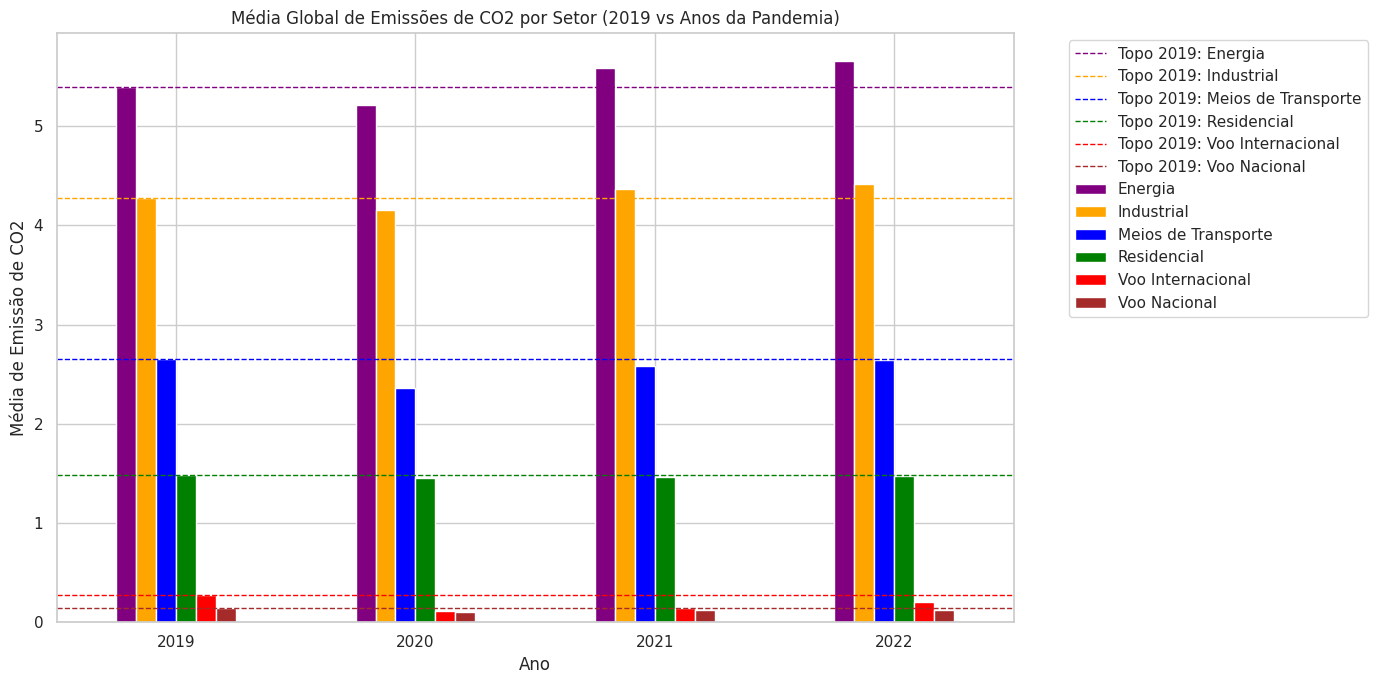

In [ ]:
pergunta_No3()

### Podemos reparar que entre os anos de 2019 e 2020, houve uma baixa considerável em todos os setores.
#### Entretanto ja em 2021 teve o efeito contrário, como as pessoas ficavam o dia inteiro em suas casas, sempre utilizando de redes sociais, internet e etc... energia e industrias tiveram aumentos drásticos de um ano pro outro.
#### E em 2022, o ultimo ano em que estavamos em estado pandêmico manteve o mesmo rumo e se manteve em uma alta dos mesmos, sem contar que alguns setores voltaram aos padrões de 2019.

# **4° Pergunta: No futuro, se mantivermos do jeito que estamos hoje, qual será o meio de poluição que degradará mais a Terra?**
## Utilizando de Machine Learning, será feito uma previsão de como seria a "pegada de carbono" dos setores listados anteriormente, assim descobrindo qual será nosso maior inimigo.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

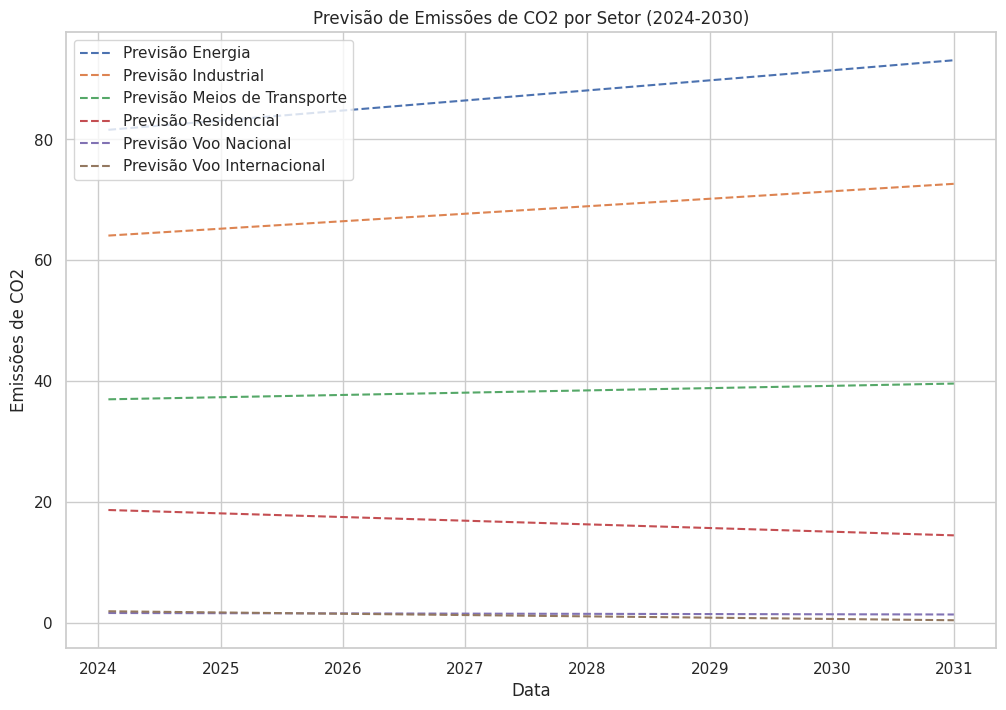

In [ ]:
pergunta_No4(emissaoCO2_df)

### Como pode ser visto, o método de Machine Learning, aprendeu os padrões dos dados dos anos anteriores e fez as previsões.
#### Em meados de 2030, a energia continuará se mantendo o maior emissor de Gás Carbônico que possuímos, por isso precismos aproveitar enquanto ainda há tempo para fazermos alguma coisa

#**5° Pergunta: É possível prever com precisão as emissões de CO2 ou há fatores inesperados que estão escapando da análise?**
## Utilizando de um gráfico de disperção saberemos o quão preciso conseguimos ser em nossas análises.
### Como o banco de dados possui MUITOS dados registrados, para esta análise foram utilizados o dia 01 de cada mês, ao invés de todos os dias dos anos.

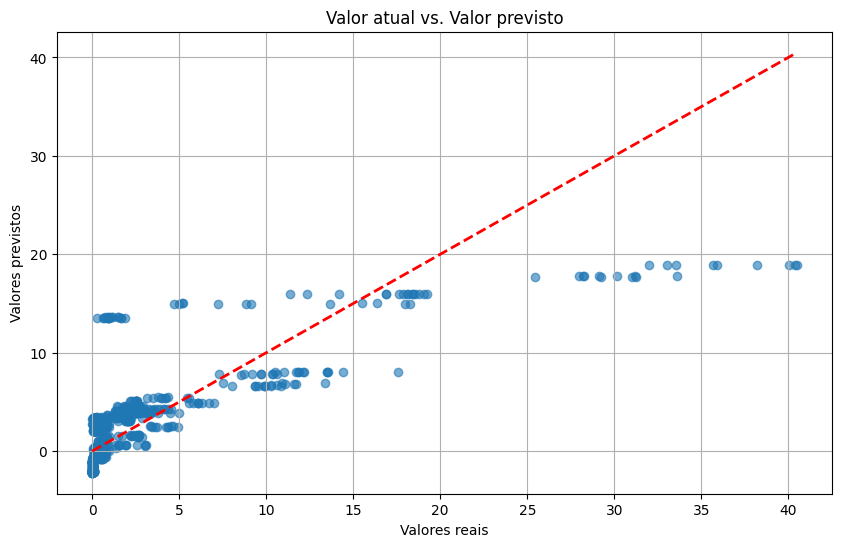

In [ ]:
pergunta_No5(emissaoCO2_df)

### Então, o que o gráfico nos mostra? A linha vermelha é o alvo perfeito: representa o que o modelo gostaria de prever. Já os pontos azuis são os valores reais, ou seja, a verdade sobre as emissões de CO2.
### Quando os pontos azuis ficam perto da linha vermelha:🎯Ele acertou em cheio nas previsões.
### Agora, se os pontos começam a se afastar...: 🚨Isso pode ser um sinal de que há fatores importantes influenciando as emissões que o modelo ainda não está capturando.
#### Algumas concentrações de pontos sugerem que setores ou países podem ter padrões bem definidos de emissão, enquanto pontos mais distantes podem ser reflexo de eventos atípicos. Isso destaca como fatores locais e globais influenciam as emissões de formas únicas.

# **Agora que ja conseguiram entender através das análises nosso maior problema atual, a geração de energia⚡, vamos para o que este documento foi feito.**
## A partir de agora as próximas perguntas serão relacionadas ao quanto o uso de energia limpa não só auxilia no gasto que se tem com contas, mas também o quanto de auxilio traz para nosso planeta Terra🌎.
## Já que estamos em uma era onde os avanços tecnológicos não param, os cuidados com o nosso tão amado mundo vão ficando cada vez mais obsoletos.

# **6° Pergunta: Por quais motivos já não é utilizado formas de geração de energia renovável em alta escala, para assim não termos de utilizar da queima de combustíveis fósseis?**
## Como o problema é não usar geradores, digamos solares, por qual motivo não podemos utilizar de muitos?
## Sem contar o alto custo de recursos na produção de um gerador solar, ele gera uma quantidade de energia significativamente menor, sem contar que funciona apenas à luz do Sol.
### Abaixo é um gráfico para tal conhecimento.

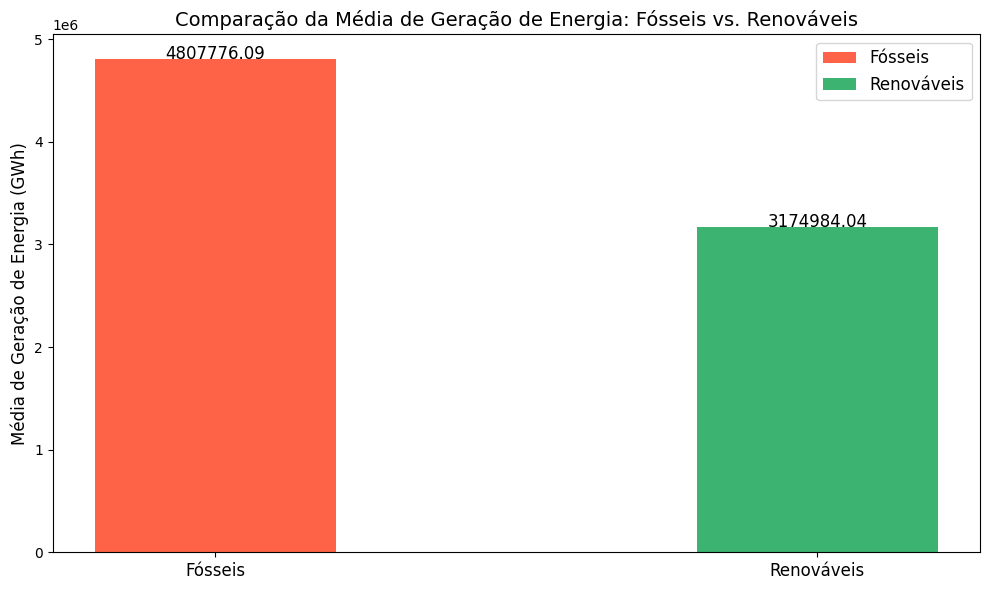

In [ ]:
pergunta_No6(diferentesGeradores_df)

### Aqui temos uma forma melhor de visualizar o quanto de energia os combustíveis fósseis geram a mais que os geradores a partir de energia limpa.
### Por esse quesito ainda estamos utilizando da queima como forma de gerar energia, contudo como vemos com paineis solares atualmente, o investimento feito nos mesmos gera energia suficiente para alimentar uma casa por si mesmo.
### Ele tendo uma bateria que armazena a energia gerada durante o dia, sendo o suficiente para alimentar a casa durante a noite.

# **7° Pergunta: Quais meios de energia são os mais eficientes?**
## Para entendermos melhor o motivo de não sobrevivermos apenas da geração de energia limpa, vamos fazer uma tabela que demonstre quais são os meios de geração mais eficientes.

In [28]:
pergunta_No7()

,Meio de Geração,Média de Geração(mW)
1,Geração nuclear,6264.66
2,Gás fóssil,5622.24
3,Geração eólica,5466.07
4,Carvão mineral,4257.28
5,Geração hídrica por reservatórios,2604.73
6,Geração solar,1431.63
7,Geração hídrica em leitos e represamentos,972.32
8,Biomassa,383.61
9,Petróleo,298.28
10,Geração por resíduos,269.4


### A avaliação indica que a Geração Nuclear é o método mais eficaz, ressaltando sua habilidade de gerar energia em larga escala, mesmo diante de desafios ambientais e de segurança. A Geração Eólica e o Gás Fóssil ocupam as seguintes posições, respectivamente. A energia eólica se sobressai como a fonte renovável mais eficaz.
### O Carvão Mineral ocupa a quarta posição entre os combustíveis fósseis, enquanto fontes renováveis como a Geração Hídrica por Barragen e a Geração Solar destacam sua importância, mesmo diante de mudanças climáticas.
#### A Biomassae o Petróleo são as fontes menos significativas. O rendimento dessas fontes destaca a capacidade inovadora das energias renováveis e a exigência de uma mudança gradual para métodos mais sustentáveis e eficazes.


# **8° Pergunta: Quanto o painel solar gera?**
## Algo pertinente de se pensar, ja que a geração solar é a forma mais prática de ser adaptado para casas, sendo necessário saber se o mesmo gera uma quantidade suficiente para não sentir falta de energia em nenhum momento do dia.

In [26]:
pergunta_No8()

<ipython-input-25-dcc6f203d2de>:323: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  solar_df['date'] = pd.to_datetime(solar_df['date'])
<ipython-input-25-dcc6f203d2de>:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_solar_days['Geração solar'] = top_10_solar_days['Geração solar'].apply(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))


,date,Geração solar
1,2016-02-05 14:00:00+01:00,5792
2,2018-03-22 12:00:00+01:00,5792
3,2018-03-22 13:00:00+01:00,5781
4,2016-01-05 13:00:00+01:00,5779
5,2016-02-05 13:00:00+01:00,5775
6,2016-01-05 14:00:00+01:00,5767
7,2016-03-05 13:00:00+01:00,5744
8,2018-03-27 14:00:00+02:00,5742
9,2018-05-16 13:00:00+02:00,5736
10,2016-03-05 14:00:00+01:00,5714


### Aqui temos os top 10 maiores momentos em que foram mais gerados energia, no intervalo de uma hora, então o numero à direita é o quanto de energia foi gerada em uma hora (valor em Mega Wats[mW]), e na esquerda a data e o horaio que foi registrado tal leitura.
### Se dermos uma olhada, todos os dados estão no horario da tarde, a partir do meio-dia, o que faz sentido, onde o Sol está no seu pico.
### Se uma casa consome em torno de 150kW/Mês (1kW = 1000mW), então por dia seriam 5kW/Dia. Em apenas uma hora (Dos picos de leitura) o gerador solar faz 5,7kW então com certeza é um investimento onde não precisará se preocupar.

# **9° Pergunta: Em quanto tempo, sem pagar uma conta de luz, o Painel de luz solar "se pagaria"?**
## Digamos que uma conta de luz em uma casa foi de 250,00 reais no mês, gastando aproximadamente 200kWh/Mês. E um KIT de painel que gera energia equivalente à 280 kWh/mês custe em torno de R$3.900,00.
##  Ou seja, sem problemas no quesito de energia, se dividirmos 3.900 por 250, descobrimos que dentro de 16 meses, ou 1 ano e 4 meses, o valor pago em contas de luz se equipara ao valor pago nos painéis solares!!!

# **10° Pergunta: Como a contribuição das fontes de energia renováveis e fósseis varia ao longo dos anos?**
## A partir da análise de um BoxPlot será possível compreendermos melhor.
### Um BoxPlot, também conhecido como gráfico de caixa, é um método visual para ilustrar a distribuição dos dados. Ele consiste em uma caixa central, conhecida como caixa interquartil, que simboliza a faixa onde se encontram a maior parte dos dados. A linha na caixa representa o valor mediano, que corresponde ao valor central dos dados. As pontas da caixa exibem o primeiro quartil (Q1) e o terceiro quartil (Q3), que apontam para onde 50% dos dados estão distribuídos. Além da caixa, existem "bigodes" que evidenciam a variação dos dados fora dela. Os valores extremos, conhecidos como outliers, são ilustrados por pontos que não estão dentro desses "bigode"s.


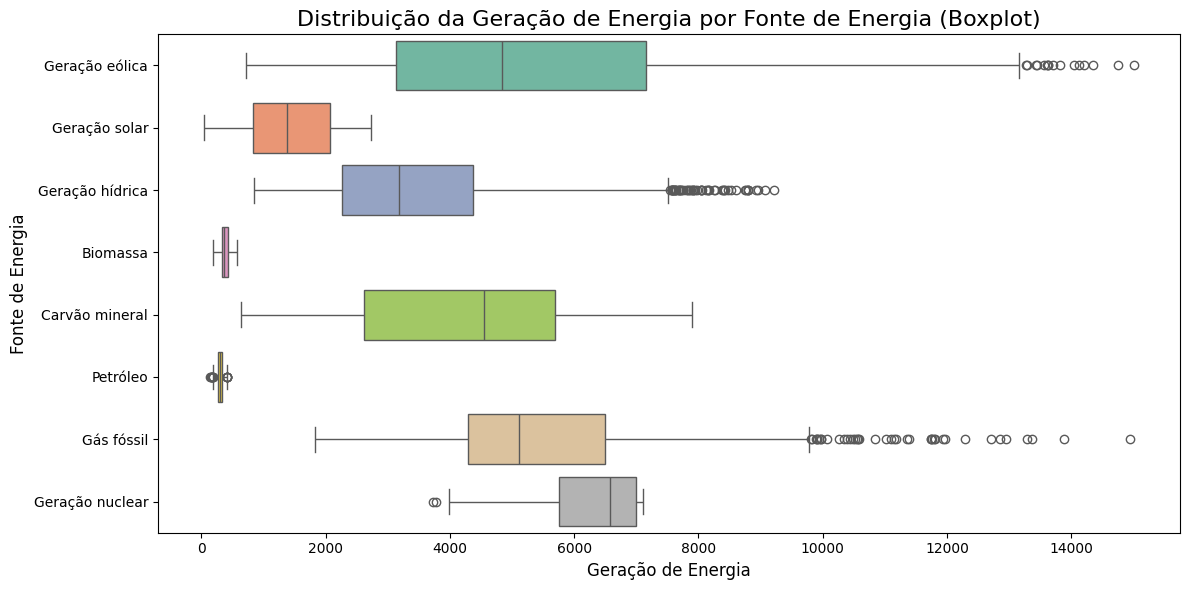

In [6]:
pergunta_No10()

### No gráfico, podemos observar a distribuição das gerações de energia para várias fontes, como geração eólica, solar, hídrica, biomassa, carvão mineral, petróleo, gás fóssil, e geração nuclear.
### As fontes renováveis como geração eólica e solar mostram uma variação mais estreita. A caixa dessas fontes é menor, o que significa que sua produção de energia tem menos variação. Ou seja, a geração de energia dessas fontes é mais consistente ao longo do tempo.
### As fontes fósseis (como gás fóssil, carvão mineral e petróleo) têm uma variação maior. A caixa e os bigodes são mais largos, o que significa que a geração dessas fontes é mais imprevisível. Além disso, é possível observar que alguns valores estão mais distantes da caixa, representando outliers — ou seja, em algumas situações, a geração dessas fontes é muito mais alta do que a média.
### De forma geral, o boxplot revela que as fontes renováveis possuem uma geração mais estável, enquanto as fontes fósseis têm variações significativas, com alguns anos de geração muito alta e outros bem abaixo da média.

# **Conclusão:**
### Em suma, este documento procura conscientizar as pessoas sobre a importância da tão conhecida energia renovável, demonstrando que o futuro da produção de energia tende a ser voltado para as fontes renováveis.
### Já que precisamos preservar o nosso planeta, para mantermos uma vida mais suadável e duradoura. Ao unir progressos tecnológicos a um cenário de maior preocupação com o meio ambiente, fontes de energia como a eólica, hidrelétricas e a solar possuem grande capacidade para superar as fósseis em termos de eficiência e sustentabilidade.
### O estudo ressalta a importância de investimentos constantes e esforços mundiais para apoiar essa mudança, assegurando um sistema energético mais limpo, estável e sustentável.



# **Referências:**

* Pandas - https://pandas.pydata.org/docs/
* Seaborn - https://seaborn.pydata.org/
* NumPy - https://numpy.org/
* Scikit-learn - https://scikit-learn.org/stable/ (ML, AI)
* Matplotlib - https://matplotlib.org/
* Python - https://penseallen.github.io/PensePython2e/
* Git - https://git-scm.com/doc
* Engie - https://www.alemdaenergia.engie.com.br (Informações)
* WriBrasil - https://www.wribrasil.org.br
* Sirius - https://energiasirius.com
* Kaggle - https://www.kaggle.com/
1. Datasets utilizados:
* "CO2 Emissions by Sectors" - https://www.kaggle.com/datasets/saloni1712/co2-emissions
* "Hourly energy demand generation and weather" - https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather